In [84]:
# Import Resources

import pandas as pd
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
#import hvplot.pandas
#import plotly.express as px
from scipy import stats
from sklearn import metrics
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [85]:
# DB connection
import pyodbc

server = 'localhost' 
database = 'AnalyticsBootcampDB' 
username = 'bootcamp' 
password = 'bootcamp' 

conString = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

conn = pyodbc.connect(conString)
cursor = conn.cursor()

In [86]:
pd.set_option('display.max_columns', None)

In [111]:
query = "SELECT * FROM dbo.AppsStageEnhanced;"
df = pd.read_sql(query, conn)

In [112]:
columnsToDrop = ['AppID','AppName','AppFancyName','CompanyName','UnrestrictedInternet','Downloads','LowPrice','TopPrice','Price','RatingCount','Installs','MinimumInstalls','MaximumInstalls','Free','ReleaseDate','LastUpdated','DaysOnMarket','ReleaseYear','GamesCount','ParentalGuidance']
df = df.drop(columnsToDrop, axis = 1)
df

,Purchases,Ads,SharesInfo,SharesLocation,UsersInteract,AgeRating,Category,PaidApp,Rating,EditorsChoice,RelativeDownloadsPerformance,CompanyIsExperienced
0,True,True,False,False,True,Everyone,sports,False,4.5,False,1.110371,False
1,True,True,False,False,False,Teen,arcade,False,4.5,True,9.903636,True
2,True,True,True,False,True,Teen,casino,False,4.5,False,2.870604,True
3,True,True,False,False,False,Everyone,puzzle,False,4.6,False,0.221404,False
4,True,True,False,False,False,Everyone,sports,False,4.5,True,18.784716,True
...,...,...,...,...,...,...,...,...,...,...,...,...
6019,None,None,None,None,None,Everyone,puzzle,False,4.1,False,0.319987,True
6020,None,None,None,None,None,Everyone,puzzle,False,4.4,False,0.029217,False
6021,None,None,None,None,None,Everyone,arcade,False,4.7,False,1.232902,True
6022,None,None,None,None,None,Everyone,casual,False,4.6,False,0.155639,True


In [113]:
df = df.dropna()

In [114]:
df

,Purchases,Ads,SharesInfo,SharesLocation,UsersInteract,AgeRating,Category,PaidApp,Rating,EditorsChoice,RelativeDownloadsPerformance,CompanyIsExperienced
0,True,True,False,False,True,Everyone,sports,False,4.5,False,1.110371,False
1,True,True,False,False,False,Teen,arcade,False,4.5,True,9.903636,True
2,True,True,True,False,True,Teen,casino,False,4.5,False,2.870604,True
3,True,True,False,False,False,Everyone,puzzle,False,4.6,False,0.221404,False
4,True,True,False,False,False,Everyone,sports,False,4.5,True,18.784716,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5972,True,False,False,False,False,Teen,strategy,True,4.7,False,0.056099,True
5973,False,True,False,False,False,Everyone,simulation,False,4.6,False,0.006494,True
5974,True,True,False,False,False,Everyone,arcade,False,4.6,False,0.072138,True
5975,False,True,False,False,False,Teen,action,False,3.7,False,1.095998,True


In [115]:
# Fix boolean column data types
df = df.convert_dtypes()

In [116]:
df.dtypes

Purchases                       boolean
Ads                             boolean
SharesInfo                      boolean
SharesLocation                  boolean
UsersInteract                   boolean
AgeRating                        string
Category                         string
PaidApp                         boolean
Rating                          float64
EditorsChoice                   boolean
RelativeDownloadsPerformance    float64
CompanyIsExperienced            boolean
dtype: object

In [117]:
# Convert boolean values to bits
df["Purchases"] = df.apply(lambda row: int(row["Purchases"]), axis=1)
df["Ads"] = df.apply(lambda row: int(row["Ads"]), axis=1)
df["SharesInfo"] = df.apply(lambda row: int(row["SharesInfo"]), axis=1)
df["SharesLocation"] = df.apply(lambda row: int(row["SharesLocation"]), axis=1)
df["UsersInteract"] = df.apply(lambda row: int(row["UsersInteract"]), axis=1)
df["PaidApp"] = df.apply(lambda row: int(row["PaidApp"]), axis=1)
df["EditorsChoice"] = df.apply(lambda row: int(row["EditorsChoice"]), axis=1)
df["CompanyIsExperienced"] = df.apply(lambda row: int(row["CompanyIsExperienced"]), axis=1)

In [118]:
df

,Purchases,Ads,SharesInfo,SharesLocation,UsersInteract,AgeRating,Category,PaidApp,Rating,EditorsChoice,RelativeDownloadsPerformance,CompanyIsExperienced
0,1,1,0,0,1,Everyone,sports,0,4.5,0,1.110371,0
1,1,1,0,0,0,Teen,arcade,0,4.5,1,9.903636,1
2,1,1,1,0,1,Teen,casino,0,4.5,0,2.870604,1
3,1,1,0,0,0,Everyone,puzzle,0,4.6,0,0.221404,0
4,1,1,0,0,0,Everyone,sports,0,4.5,1,18.784716,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5972,1,0,0,0,0,Teen,strategy,1,4.7,0,0.056099,1
5973,0,1,0,0,0,Everyone,simulation,0,4.6,0,0.006494,1
5974,1,1,0,0,0,Everyone,arcade,0,4.6,0,0.072138,1
5975,0,1,0,0,0,Teen,action,0,3.7,0,1.095998,1


In [2]:
# Read cleaned csv into df - deprecated

#df = pd.read_csv(Path('preprocess_3.csv'))

#df.head()

,purchases,ads,sharesinfo,shareslocation,usersinteract,category,paidapp,Content Rating,Editors Choice,CompanyIsExperienced,Install per Avg,Rating
0,1,1,0,0,1,sports,0,Everyone,0,0,1.11,4.5
1,1,1,0,0,0,arcade,0,Teen,1,1,9.90,4.4
2,1,1,1,0,1,casino,0,Teen,0,1,2.87,4.3
3,1,1,0,0,0,puzzle,0,Everyone,0,0,0.22,4.5
4,1,1,0,0,0,sports,0,Everyone,1,1,18.78,4.4


In [119]:
# Encode categorical & content rating columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['AgeRating'] = le.fit_transform(df['AgeRating'])
df['Category'] = le.fit_transform(df['Category'])
df_encoded = df

df

,Purchases,Ads,SharesInfo,SharesLocation,UsersInteract,AgeRating,Category,PaidApp,Rating,EditorsChoice,RelativeDownloadsPerformance,CompanyIsExperienced
0,1,1,0,0,1,0,13,0,4.5,0,1.110371,0
1,1,1,0,0,0,3,2,0,4.5,1,9.903636,1
2,1,1,1,0,1,3,5,0,4.5,0,2.870604,1
3,1,1,0,0,0,0,9,0,4.6,0,0.221404,0
4,1,1,0,0,0,0,13,0,4.5,1,18.784716,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5972,1,0,0,0,0,3,14,1,4.7,0,0.056099,1
5973,0,1,0,0,0,0,12,0,4.6,0,0.006494,1
5974,1,1,0,0,0,0,2,0,4.6,0,0.072138,1
5975,0,1,0,0,0,3,0,0,3.7,0,1.095998,1


In [120]:
# Drop any NaN rows of data

df_encoded_nonNA = df_encoded.dropna()
df_encoded_nonNA

,Purchases,Ads,SharesInfo,SharesLocation,UsersInteract,AgeRating,Category,PaidApp,Rating,EditorsChoice,RelativeDownloadsPerformance,CompanyIsExperienced
0,1,1,0,0,1,0,13,0,4.5,0,1.110371,0
1,1,1,0,0,0,3,2,0,4.5,1,9.903636,1
2,1,1,1,0,1,3,5,0,4.5,0,2.870604,1
3,1,1,0,0,0,0,9,0,4.6,0,0.221404,0
4,1,1,0,0,0,0,13,0,4.5,1,18.784716,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5972,1,0,0,0,0,3,14,1,4.7,0,0.056099,1
5973,0,1,0,0,0,0,12,0,4.6,0,0.006494,1
5974,1,1,0,0,0,0,2,0,4.6,0,0.072138,1
5975,0,1,0,0,0,3,0,0,3.7,0,1.095998,1


In [121]:
# Sanity check on statistics
df_encoded_nonNA.describe()

,Purchases,Ads,SharesInfo,SharesLocation,UsersInteract,AgeRating,Category,PaidApp,Rating,EditorsChoice,RelativeDownloadsPerformance,CompanyIsExperienced
count,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000
mean,0.783503,0.832190,0.024092,0.010206,0.159612,0.772796,7.729128,0.050192,4.215593,0.051029,1.002967,0.648319
std,0.411891,0.373729,0.153349,0.100515,0.366276,1.197488,4.728762,0.218360,0.381528,0.220075,2.624920,0.477535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000341,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,4.000000,0.000000,0.082137,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,4.300000,0.000000,0.255486,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,12.000000,0.000000,4.500000,0.000000,0.816270,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,16.000000,1.000000,4.900000,1.000000,67.833895,1.000000


In [122]:
# Set X and y variables for analysis

X = df_encoded_nonNA.drop(columns=['RelativeDownloadsPerformance','Rating'],axis=1)
#y = df_encoded_nonNA.iloc[:, lambda df_encoded_nonNA: [10,11]]
y = df_encoded[['Rating','RelativeDownloadsPerformance']]
y

,Rating,RelativeDownloadsPerformance
0,4.5,1.110371
1,4.5,9.903636
2,4.5,2.870604
3,4.6,0.221404
4,4.5,18.784716
...,...,...
5972,4.7,0.056099
5973,4.6,0.006494
5974,4.6,0.072138
5975,3.7,1.095998


In [123]:
# Fit StandardScaler on y values for PCA purposes

scaler = StandardScaler()

y_scaler = scaler.fit(y)
y_scaled = y_scaler.transform(y)

y_scaled

array([[ 0.74550472,  0.04092031],
       [ 0.74550472,  3.39111835],
       [ 0.74550472,  0.71156216],
       ...,
       [ 1.00763082, -0.35464216],
       [-1.35150414,  0.03544436],
       [-0.82725192, -0.30003477]])

In [124]:
# Create new success metric that combines both outcome variables

pca = PCA(n_components=1)
pca_y = pca.fit_transform(y_scaled)

# Display explained PCA variance

pca.explained_variance_ratio_


array([0.53053791])

In [125]:
# Check out component distribution of PCA variable

pca.components_

array([[0.70710678, 0.70710678]])

In [126]:
# Create df series for newly created outcome variable

df_pca = pd.DataFrame(pca_y, columns=['PC1'])

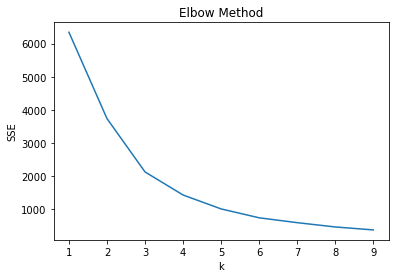

In [127]:
# Use k-means to find optimal cluster point to run our clustering on

sse = {}
K = range(1, 10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(pca_y)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [128]:
# Create a KMeans model with 4 clusters
model = KMeans(n_clusters=4, random_state=1).fit(pca_y)

cluster = model.predict(pca_y)

# Create df on cluster series
df_cluster = pd.DataFrame(cluster, columns=['Cluster'])

# Merge PCA & cluster dfs onto main df

df_combined = df_encoded_nonNA.join(df_pca, how='inner')

df_combined = df_combined.join(df_cluster, how='inner')
df_combined.head()



,Purchases,Ads,SharesInfo,SharesLocation,UsersInteract,AgeRating,Category,PaidApp,Rating,EditorsChoice,RelativeDownloadsPerformance,CompanyIsExperienced,PC1,Cluster
0,1,1,0,0,1,0,13,0,4.5,0,1.110371,0,0.556086,0
1,1,1,0,0,0,3,2,0,4.5,1,9.903636,1,2.925034,2
2,1,1,1,0,1,3,5,0,4.5,0,2.870604,1,1.030302,0
3,1,1,0,0,0,0,9,0,4.6,0,0.221404,0,0.501946,0
4,1,1,0,0,0,0,13,0,4.5,1,18.784716,1,5.317640,2


In [129]:
# Declare new combined outcome variable

y = df_combined['PC1']

# Fit the StandardScaler on X values for regression purposes
X_scaler = scaler.fit(X)
X_scaled = X_scaler.transform(X)

In [131]:
# Declare new y variable for logistic regression testing

y = df_combined['Cluster'].ravel()

In [132]:
# Initial test setup

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [133]:
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [134]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)


In [135]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)


In [136]:
# Calculating the accuracy score of model

acc_score = accuracy_score(y_test, predictions)
acc_score

0.5036789297658862

In [137]:
# Calculate feature importance in the Random Forest model.

importances = rf_model.feature_importances_

# Sort importance of features for our model

sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.4885748657415574, 'Category'),
 (0.15724124043176896, 'AgeRating'),
 (0.06718180379906707, 'Ads'),
 (0.053960765600454895, 'UsersInteract'),
 (0.051340837778016145, 'CompanyIsExperienced'),
 (0.050475611796515885, 'Purchases'),
 (0.040242547360714524, 'PaidApp'),
 (0.03775528177817114, 'EditorsChoice'),
 (0.03442348286793132, 'SharesInfo'),
 (0.018803562845802584, 'SharesLocation')]

In [138]:
df_combined

,Purchases,Ads,SharesInfo,SharesLocation,UsersInteract,AgeRating,Category,PaidApp,Rating,EditorsChoice,RelativeDownloadsPerformance,CompanyIsExperienced,PC1,Cluster
0,1,1,0,0,1,0,13,0,4.5,0,1.110371,0,0.556086,0
1,1,1,0,0,0,3,2,0,4.5,1,9.903636,1,2.925034,2
2,1,1,1,0,1,3,5,0,4.5,0,2.870604,1,1.030302,0
3,1,1,0,0,0,0,9,0,4.6,0,0.221404,0,0.501946,0
4,1,1,0,0,0,0,13,0,4.5,1,18.784716,1,5.317640,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5972,1,0,0,0,0,3,14,1,4.7,0,0.056099,1,0.642763,0
5973,0,1,0,0,0,0,12,0,4.6,0,0.006494,1,0.444048,0
5974,1,1,0,0,0,0,2,0,4.6,0,0.072138,1,0.461733,0
5975,0,1,0,0,0,3,0,0,3.7,0,1.095998,1,-0.930595,3


In [140]:
clust_rank = {
   2: 0,
   1: 1,
   0: 2,
   3: 3,
}
df_combined['Cluster'] = df_combined["Cluster"].apply(lambda x: clust_rank[x])
df_combined

,Purchases,Ads,SharesInfo,SharesLocation,UsersInteract,AgeRating,Category,PaidApp,Rating,EditorsChoice,RelativeDownloadsPerformance,CompanyIsExperienced,PC1,Cluster,Cluster_Reordered
0,1,1,0,0,1,0,13,0,4.5,0,1.110371,0,0.556086,2,2
1,1,1,0,0,0,3,2,0,4.5,1,9.903636,1,2.925034,0,0
2,1,1,1,0,1,3,5,0,4.5,0,2.870604,1,1.030302,2,2
3,1,1,0,0,0,0,9,0,4.6,0,0.221404,0,0.501946,2,2
4,1,1,0,0,0,0,13,0,4.5,1,18.784716,1,5.317640,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5972,1,0,0,0,0,3,14,1,4.7,0,0.056099,1,0.642763,2,2
5973,0,1,0,0,0,0,12,0,4.6,0,0.006494,1,0.444048,2,2
5974,1,1,0,0,0,0,2,0,4.6,0,0.072138,1,0.461733,2,2
5975,0,1,0,0,0,3,0,0,3.7,0,1.095998,1,-0.930595,3,3


In [25]:
# Export as csv for storyboard purposes

df_combined.to_csv("ML_Results.csv", index=False)

In [26]:
# fig = px.scatter(df_encoded_nonNA, x="PC1", y="install_scaled",color='Cluster',width=800)
# fig.update_layout(legend=dict(x=0,y=1))
# fig.show()